# Hello and welcome to my Jupyter notebook for the Kaggle Housing Prices competition!
We will start this workbook by downloading the necessary data files, which I have placed on my GitHub profile in the same repository as this notebook.

## Acquiring the Data Files

In [881]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
train_file = pd.read_csv('https://github.com/akozikow/Kaggle_Housing_Prices_Regression/raw/refs/heads/main/housing_train.csv')
test_file = pd.read_csv('https://github.com/akozikow/Kaggle_Housing_Prices_Regression/raw/refs/heads/main/housing_test.csv')
print(train_file.shape) #check file shapes
print(test_file.shape)

(1460, 81)
(1459, 80)


Note: The test file will have one additional column (the target column)

In [883]:
train_file.head(3) #check that the train file looks good

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [884]:
train_file.head(3) #check that the test file looks good

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


## Dealing with NA values

The first thing we should do is evalute what columns have NA values, how many they have, and what data types they are. This will dictate how we deal with them.

In [887]:
na_train_cols = train_file.columns[train_file.isnull().any()]
train_file[na_train_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   Alley         91 non-null     object 
 2   MasVnrType    588 non-null    object 
 3   MasVnrArea    1452 non-null   float64
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   Electrical    1459 non-null   object 
 10  FireplaceQu   770 non-null    object 
 11  GarageType    1379 non-null   object 
 12  GarageYrBlt   1379 non-null   float64
 13  GarageFinish  1379 non-null   object 
 14  GarageQual    1379 non-null   object 
 15  GarageCond    1379 non-null   object 
 16  PoolQC        7 non-null      object 
 17  Fence         281 non-null    object 
 18  MiscFeature   54 non-null   

In [888]:
na_test_cols = test_file.columns[test_file.isnull().any()]
test_file[na_test_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      1455 non-null   object 
 1   LotFrontage   1232 non-null   float64
 2   Alley         107 non-null    object 
 3   Utilities     1457 non-null   object 
 4   Exterior1st   1458 non-null   object 
 5   Exterior2nd   1458 non-null   object 
 6   MasVnrType    565 non-null    object 
 7   MasVnrArea    1444 non-null   float64
 8   BsmtQual      1415 non-null   object 
 9   BsmtCond      1414 non-null   object 
 10  BsmtExposure  1415 non-null   object 
 11  BsmtFinType1  1417 non-null   object 
 12  BsmtFinSF1    1458 non-null   float64
 13  BsmtFinType2  1417 non-null   object 
 14  BsmtFinSF2    1458 non-null   float64
 15  BsmtUnfSF     1458 non-null   float64
 16  TotalBsmtSF   1458 non-null   float64
 17  BsmtFullBath  1457 non-null   float64
 18  BsmtHalfBath  1457 non-null 

We can see that there are a lot more columns in the test file that have NA entries than in the train file. That said, many of them are only missing one or two entires, so whatever imputing strategy we choose will be minimally impactful to the overall dataset.

We will start with LotFrontage, and the way we handle this will be representative of how we will tackle NA values in the rest of the file. Let's take a look at the non-NA values in the dataset in a histogram.

minimum value for LotFrontage (not NA): 21.0


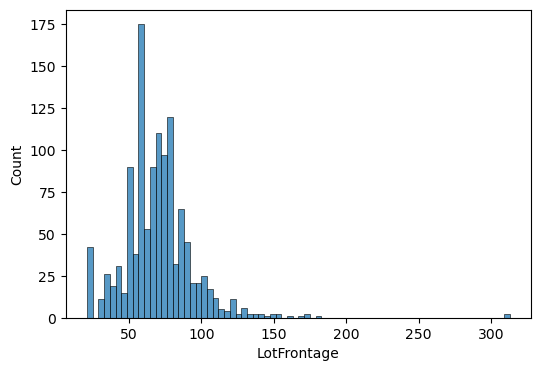

In [891]:
import seaborn as sns
import matplotlib.pyplot as plt
train_data = train_file.copy()
target = train_data['SalePrice']
test_data = test_file.copy()
plt.figure(figsize = (6, 4))
sns.histplot(train_data['LotFrontage'].dropna())
print(f'minimum value for LotFrontage (not NA): {train_data['LotFrontage'].dropna().min()}')

In [892]:
train_data.loc[(train_data['LotFrontage'].isnull()), 'LotFrontage'] = 0 #impute 0 for all LotFrontage NA Values

Here we observe a few key points: first, the distribution of the data is largely normal except for a few extreme values on the lower end, and even fewer on the higher end. Second, there are no 0 values. LotFrontage (from the Data Description file accompanying this file, which is also in the same GitHub repository), describes LotFrontage as a feature that measures as the "Linear feet of street connected to the property", suggesting NA here means there is no connection between the street and the property. Since we cannot have NA values in our data, a good strategy for this feature seems to be to replace the NA values with 0. Another option is to create a new feature that is a binary 1 or 0 for street connection; for now, we will do the former.

As one more example, we will look at the Alley feature, which denotes the type of alley access to the property.

<Axes: xlabel='Alley', ylabel='SalePrice'>

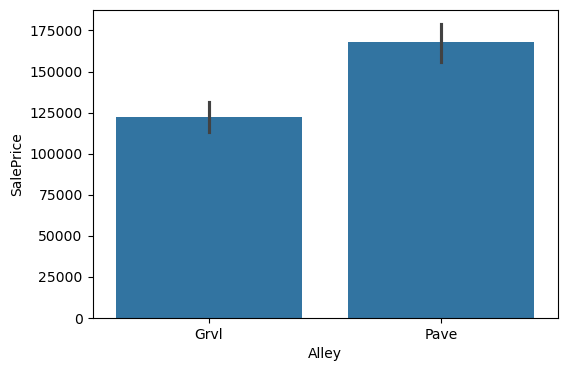

In [895]:
plt.figure(figsize = (6, 4))
sns.barplot(x = train_data['Alley'].dropna(), y = target)

We can see here there are only two non-NA options, and NA really means 'No Alley Access', so we can replace the NA values in this feature to that effect (i.e, replace the NA values with 'None').

In [897]:
import numpy as np
train_data.loc[(train_data['Alley'].isnull()), 'Alley'] = 'None'

<Axes: xlabel='Alley', ylabel='SalePrice'>

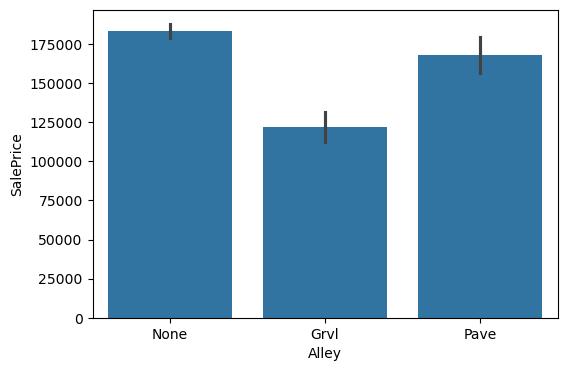

In [898]:
plt.figure(figsize = (6, 4))
sns.barplot(x = train_data['Alley'], y = target)

Here, we can see that by creating the 'None' category, we observe that alley access of any kind leads to a lower average sale price.

In [900]:
masonry = train_data[['MasVnrType', 'MasVnrArea']]
masonry[masonry['MasVnrType'].isnull()]

,MasVnrType,MasVnrArea
1,NaN,0.0
3,NaN,0.0
5,NaN,0.0
8,NaN,0.0
9,NaN,0.0
...,...,...
1454,NaN,0.0
1455,NaN,0.0
1457,NaN,0.0
1458,NaN,0.0


In [901]:
train_data.loc[(train_data['MasVnrType'].isnull()), 'MasVnrType'] = 'None'
train_data.loc[(train_data['MasVnrArea'].isnull()), 'MasVnrArea'] = 0

In [902]:
basements = train_data[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']]
basements[basements['BsmtQual'].isnull()]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
17,NaN,NaN,NaN,NaN,0,NaN,0,0,0
39,NaN,NaN,NaN,NaN,0,NaN,0,0,0
90,NaN,NaN,NaN,NaN,0,NaN,0,0,0
102,NaN,NaN,NaN,NaN,0,NaN,0,0,0
156,NaN,NaN,NaN,NaN,0,NaN,0,0,0
182,NaN,NaN,NaN,NaN,0,NaN,0,0,0
259,NaN,NaN,NaN,NaN,0,NaN,0,0,0
342,NaN,NaN,NaN,NaN,0,NaN,0,0,0
362,NaN,NaN,NaN,NaN,0,NaN,0,0,0
371,NaN,NaN,NaN,NaN,0,NaN,0,0,0


In [903]:
train_data.loc[(train_data['BsmtQual'].isnull()), 'BsmtQual'] = 'None'
train_data.loc[(train_data['BsmtCond'].isnull()), 'BsmtCond'] = 'None'
train_data.loc[(train_data['BsmtExposure'].isnull()), 'BsmtExposure'] = 'None'
train_data.loc[(train_data['BsmtFinType1'].isnull()), 'BsmtFinType1'] = 'None'
train_data.loc[(train_data['BsmtFinType2'].isnull()), 'BsmtFinType2'] = 'None'

In [904]:
train_data[train_data['Electrical'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,None,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [905]:
train_data['Electrical'].value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [906]:
train_data.loc[train_data['Electrical'].isnull(), 'Electrical'] = 'SBrkr'

In [907]:
fireplaces = train_data[['Fireplaces', 'FireplaceQu']]
fireplaces[fireplaces['FireplaceQu'].isnull()].sum()

Fireplaces     0
FireplaceQu    0
dtype: object

In [908]:
train_data.loc[train_data['FireplaceQu'].isnull(), 'FireplaceQu'] = 'None'

In [909]:
train_data.loc[(train_data['GarageType'].isnull()), 'GarageType'] = 'None'
train_data.loc[(train_data['GarageFinish'].isnull()), 'GarageFinish'] = 'None'
train_data.loc[(train_data['GarageQual'].isnull()), 'GarageQual'] = 'None'
train_data.loc[(train_data['GarageCond'].isnull()), 'GarageCond'] = 'None'

In [910]:
print(f'train oldest garage year: {train_data['GarageYrBlt'].min()} | train newest garage year: {train_data['GarageYrBlt'].max()}')

train oldest garage year: 1900.0 | train newest garage year: 2010.0


In [911]:
print(f'test oldest garage year: {test_data['GarageYrBlt'].min()} | test newest garage year: {test_data['GarageYrBlt'].max()}')

test oldest garage year: 1895.0 | test newest garage year: 2207.0


In [912]:
test_data['GarageYrBlt'][test_data['GarageYrBlt'] > 2010]

1132    2207.0
Name: GarageYrBlt, dtype: float64

In [913]:
test_data.loc[test_data['GarageYrBlt'] == 2207, 'GarageYrBlt'] = 2007

In [914]:
bin_years= []
for year in train_data['GarageYrBlt'].unique():
    if year % 10 == 0:
        bin_years.append(year)
bin_years.append(1890.0)
bin_years = sorted(bin_years)
bin_years.append(np.inf)
bin_years
labels = ("1890s", "1900s", "1910s", "1920s", "1930s", "1940s", "1950s", "1960s", "1970s", "1980s", "1990s", "2000s", "2010s")
train_data['GarageYrBlt'] = pd.cut(train_data['GarageYrBlt'], bins = bin_years, labels = labels)
train_data['GarageYrBlt'] = train_data['GarageYrBlt'].astype('object')
train_data.loc[(train_data['GarageYrBlt'].isnull()), 'GarageYrBlt'] = 'None'

In [915]:
train_data['PoolArea'].value_counts()

PoolArea
0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: count, dtype: int64

In [916]:
train_data = train_data.drop('PoolQC', axis = 1)

In [917]:
train_data.loc[(train_data['Fence'].isnull()), 'Fence'] = 'None'

In [918]:
train_data.loc[(train_data['MiscFeature'].isnull()), 'MiscFeature'] = 'None'

In [919]:
na_train_cols = train_data.columns[train_data.isnull().any()]
train_data[na_train_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Empty DataFrame


In [920]:
test_data.loc[(test_data['LotFrontage'].isnull()), 'LotFrontage'] = 0
test_data.loc[(test_data['Alley'].isnull()), 'Alley'] = 'None'
test_data.loc[(test_data['MasVnrType'].isnull()), 'MasVnrType'] = 'None'
test_data.loc[(test_data['MasVnrArea'].isnull()), 'MasVnrArea'] = 0
test_data.loc[(test_data['BsmtQual'].isnull()), 'BsmtQual'] = 'None'
test_data.loc[(test_data['BsmtCond'].isnull()), 'BsmtCond'] = 'None'
test_data.loc[(test_data['BsmtExposure'].isnull()), 'BsmtExposure'] = 'None'
test_data.loc[(test_data['BsmtFinType1'].isnull()), 'BsmtFinType1'] = 'None'
test_data.loc[(test_data['BsmtFinType2'].isnull()), 'BsmtFinType2'] = 'None'
test_data.loc[test_data['Electrical'].isnull(), 'Electrical'] = 'SBrkr'
test_data.loc[test_data['FireplaceQu'].isnull(), 'FireplaceQu'] = 'None'
test_data.loc[(test_data['GarageType'].isnull()), 'GarageType'] = 'None'
test_data.loc[(test_data['GarageFinish'].isnull()), 'GarageFinish'] = 'None'
test_data.loc[(test_data['GarageQual'].isnull()), 'GarageQual'] = 'None'
test_data.loc[(test_data['GarageCond'].isnull()), 'GarageCond'] = 'None'
test_data = test_data.drop('PoolQC', axis = 1)
test_data.loc[(test_data['Fence'].isnull()), 'Fence'] = 'None'
test_data.loc[(test_data['MiscFeature'].isnull()), 'MiscFeature'] = 'None'
test_data['GarageYrBlt'] = pd.cut(test_data['GarageYrBlt'], bins = bin_years, labels = labels)
test_data['GarageYrBlt'] = test_data['GarageYrBlt'].astype('object')
test_data.loc[(test_data['GarageYrBlt'].isnull()), 'GarageYrBlt'] = 'None'

In [921]:
na_test_cols = test_data.columns[test_data.isnull().any()]
test_data[na_test_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      1455 non-null   object 
 1   Utilities     1457 non-null   object 
 2   Exterior1st   1458 non-null   object 
 3   Exterior2nd   1458 non-null   object 
 4   BsmtFinSF1    1458 non-null   float64
 5   BsmtFinSF2    1458 non-null   float64
 6   BsmtUnfSF     1458 non-null   float64
 7   TotalBsmtSF   1458 non-null   float64
 8   BsmtFullBath  1457 non-null   float64
 9   BsmtHalfBath  1457 non-null   float64
 10  KitchenQual   1458 non-null   object 
 11  Functional    1457 non-null   object 
 12  GarageCars    1458 non-null   float64
 13  GarageArea    1458 non-null   float64
 14  SaleType      1458 non-null   object 
dtypes: float64(8), object(7)
memory usage: 171.1+ KB


In [922]:
from sklearn.impute import SimpleImputer
mode_imputer = SimpleImputer(strategy = 'most_frequent')
mean_imputer = SimpleImputer(strategy = 'mean')
mode_impute_cols = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'Functional', 'SaleType']
mean_impute_cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea']
for col in mode_impute_cols:
    test_data[[col]] = mode_imputer.fit_transform(test_data[[col]])
for col in mean_impute_cols:
    test_data[[col]] = mean_imputer.fit_transform(test_data[[col]])

In [923]:
print(f'train data shape: {train_data.shape} | test data shape: {test_data.shape}')

train data shape: (1460, 80) | test data shape: (1459, 79)


## Data Transformation

Text(0.5, 1.0, 'Log Transformed Sale Price')

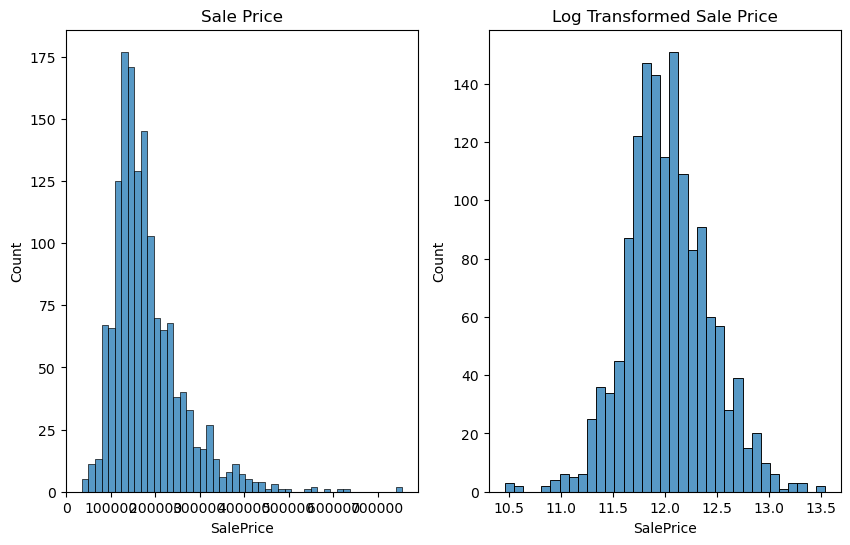

In [925]:
plt.figure(figsize = (10, 6))
plt.subplot(1, 2, 1)
sns.histplot(target)
plt.title('Sale Price')
plt.subplot(1, 2, 2)
sns.histplot(np.log(target))
plt.title('Log Transformed Sale Price')

In [926]:
target = np.log(target)

In [927]:
num_cols = train_data.select_dtypes(include = np.number).columns.tolist()
obj_cols = train_data.select_dtypes(include = 'object').columns.tolist()
test_num_cols = test_data.select_dtypes(include = np.number).columns.tolist()
test_obj_cols = test_data.select_dtypes(include = 'object').columns.tolist()
num_train = train_data[num_cols]
obj_train = train_data[obj_cols]
num_test = test_data[test_num_cols]
obj_test = test_data[obj_cols]

In [928]:
from sklearn.preprocessing import TargetEncoder
t_encoder = TargetEncoder(smooth  ='auto', target_type = 'continuous', cv = 5)
for col in obj_train.columns:
    t_encoder.fit(obj_train[[col]], target)
    obj_train[[col]] = t_encoder.transform(obj_train[[col]])
    obj_test[[col]] = t_encoder.transform(obj_test[[col]])

In [929]:
num_train = num_train.drop('SalePrice', axis = 1)

In [930]:
skew = pd.DataFrame(num_train.skew())
skew[0] = abs(skew[0])
skew = skew.sort_values(by = 0)
skewed_features = skew[skew[0] >= 0.5].index
skewed_features

Index(['YearRemodAdd', 'BsmtFullBath', 'YearBuilt', 'Fireplaces', 'HalfBath',
       'TotRmsAbvGrd', 'OverallCond', '2ndFlrSF', 'BsmtUnfSF', 'GrLivArea',
       '1stFlrSF', 'MSSubClass', 'TotalBsmtSF', 'WoodDeckSF', 'BsmtFinSF1',
       'OpenPorchSF', 'MasVnrArea', 'EnclosedPorch', 'BsmtHalfBath',
       'ScreenPorch', 'BsmtFinSF2', 'KitchenAbvGr', 'LowQualFinSF',
       '3SsnPorch', 'LotArea', 'PoolArea', 'MiscVal'],
      dtype='object')

In [931]:
for column in skewed_features:
    num_train[column] = np.log1p(num_train[column])
    num_test[column] = np.log1p(num_test[column])

In [932]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for column in num_train.columns:
    num_train[[column]] = scaler.fit_transform(num_train[[column]])
    num_test[[column]] = scaler.fit_transform(num_test[[column]])

In [933]:
train_combo = pd.concat([num_train, obj_train], axis = 1)
test_combo = pd.concat([num_test, obj_test], axis = 1)

In [934]:
print(f'Train DataFrame Shape: {train_combo.shape} | Test DataFrame Shape: {test_combo.shape}')

Train DataFrame Shape: (1460, 79) | Test DataFrame Shape: (1459, 79)


In [935]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_combo, target, test_size = 0.2, random_state = 42)

In [936]:
# mlxtend install commented out
# !pip install mlxtend 

In [937]:
from xgboost import XGBRegressor
# following commented out to avoid long training process. selected indices are given in the cell below
# from mlxtend.feature_selection import SequentialFeatureSelector
# xgb_model = XGBRegressor() 
# SFS = SequentialFeatureSelector(estimator = xgb_model, k_features = 'best', forward = True, scoring = 'neg_mean_squared_error', cv = 5)
# SFS.fit(X_train, y_train)

In [938]:
selected_indices = list((4,
 5,
 7,
 9,
 10,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 24,
 26,
 29,
 30,
 31,
 32,
 33,
 35,
 36,
 37,
 38,
 41,
 42,
 43,
 44,
 45,
 46,
 48,
 49,
 50,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 70,
 71,
 72,
 74,
 75,
 76,
 77,
 78))

In [939]:
train_combo = train_combo.iloc[:, selected_indices]
test_combo = test_combo.iloc[:, selected_indices]

In [940]:
train_combo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 57 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OverallQual    1460 non-null   float64
 1   OverallCond    1460 non-null   float64
 2   YearRemodAdd   1460 non-null   float64
 3   BsmtFinSF1     1460 non-null   float64
 4   BsmtFinSF2     1460 non-null   float64
 5   TotalBsmtSF    1460 non-null   float64
 6   1stFlrSF       1460 non-null   float64
 7   2ndFlrSF       1460 non-null   float64
 8   LowQualFinSF   1460 non-null   float64
 9   GrLivArea      1460 non-null   float64
 10  BsmtFullBath   1460 non-null   float64
 11  BsmtHalfBath   1460 non-null   float64
 12  FullBath       1460 non-null   float64
 13  HalfBath       1460 non-null   float64
 14  BedroomAbvGr   1460 non-null   float64
 15  KitchenAbvGr   1460 non-null   float64
 16  Fireplaces     1460 non-null   float64
 17  GarageArea     1460 non-null   float64
 18  Enclosed

In [941]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_combo, target, test_size = 0.2, random_state = 42)

In [942]:
from sklearn.model_selection import GridSearchCV
xgbm = XGBRegressor()
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1],
    'reg_alpha': [0, 1, 3],
    'reg_lambda': [0, 1, 3]
}
# following commented out to avoid long training process. selected hyperparameters are given in the cell below
# xgb_grid_search = GridSearchCV(estimator = xgbm, param_grid = param_grid, cv = 10, scoring = 'neg_mean_squared_error')
# xgb_grid_search.fit(X_train, y_train)
# print(xgb_grid_search.best_params_)

In [943]:
best_params = {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'reg_alpha': 0, 'reg_lambda': 0, 'subsample': 0.8}

In [944]:
best_params

{'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 300,
 'reg_alpha': 0,
 'reg_lambda': 0,
 'subsample': 0.8}

In [945]:
best_xgb_model = XGBRegressor(
    colsample_bytree = 0.8,
    gamma = 0,
    learning_rate = 0.1,
    max_depth = 3,
    n_estimators = 300,
    reg_alpha = 0,
    reg_lambda = 0,
    subsample = 0.8)
best_xgb_model.fit(X_train, y_train)
final_preds = best_xgb_model.predict(test_combo)
final_preds = np.exp(final_preds)
#following commented out to avoid creating prediction file when running the notebook
# pred_df = pd.DataFrame({'Id' : test_file['Id'], 'SalePrice':final_preds})
# pred_df.to_csv('akozikowski_housing_sfs_xgb.csv', index = False)

In [946]:
final_preds

array([115157.34, 151092.23, 182926.1 , ..., 146799.08, 117911.6 ,
       185214.28], dtype=float32)